# Data Cleaning Walkthrough

_A short, practical intro to getting data into model-ready shape._

---

## I. **Data Cleaning**

This walkthrough shows how to prepare messy data so AI libraries can use it—typically by converting to numerical form **without losing meaning**.

**Goal:** Transform raw data into consistent, validated, and machine-readable features.

**In this section, we’ll cover:**
- Custom functions (e.g., text/field normalization, parsing, feature engineering)
- One-Hot Encoding (categorical → binary indicators)
- Label Encoding (categorical → integer labels)

---

## II. **Text → Numbers**

**Question:** Can we turn natural language into numerical representations suitable for models?

**In this section, we’ll explore:**
- Word Cloud (quick intuition about term salience)
- t-SNE cluster visualization (project high-dimensional text vectors to 2D)


In [ ]:
# Install required packages 
# !pip install pandas kagglehub scikit-learn matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


### Access dataset- Learn more about dataset

[Kaggle e-commerce customer behavior](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset)

In [1]:
# Import Kagglehub (where we are accessing dataset)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

# Display path to dataset
print("Path to dataset files:", path)

Path to dataset files: /Users/mo/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1


In [2]:
# Import Pandas library
import pandas as pd

# Import kaggle E-commerce dataset in as a pandas dataframe
data = pd.read_csv(f'{path}/E-commerce Customer Behavior - Sheet1.csv')

# Display first 5 sample rows of dataset
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


# Data Exploration

Simple data exploration be to understnand the columns and how they would need to be tranformed in order to run them through an AI Unsupervised ML Algorithm

### Numerical vs. Categorical Data

##### **Numerical Data** is what the computer can process
##### **Categorical Data** is letters, words, or symbols that we have to turn into a numerical representation in order to process but keep the meaning behind each.

In [4]:
# Separate the numerical columns from the text columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

---
### Numerical vs. Categorical (Text)
##### Notice how categorical data is represented in regular words that we understand.     
##### As data scientist it is our job to turn the text into meaningful numerical representations.
---

In [7]:
# Display a sample of both sets of data Numerical vs Categorical (Text)
display(numerical_data.head())
print("Categorical Data")
display(categorical_data.head())

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,101,29,1120.20,14,4.6,25
1,102,34,780.50,11,4.1,18
2,103,43,510.75,9,3.4,42
3,104,30,1480.30,19,4.7,12
4,105,27,720.40,13,4.0,55


Categorical Data


,Gender,City,Membership Type,Satisfaction Level
0,Female,New York,Gold,Satisfied
1,Male,Los Angeles,Silver,Neutral
2,Female,Chicago,Bronze,Unsatisfied
3,Male,San Francisco,Gold,Satisfied
4,Male,Miami,Silver,Unsatisfied


## Three main methods used to *turn a categorical/text columns into a numerical columns*

### **Crustom functions** - to pair each unique label with a number, example 1-True, 0-False
### **OneHotEncoder** - Tool used to transform categorical labels by creating a column for each unique value, dramatically extending the dataset
### **LabelEncoder** - Tool used to transform categorical labels, keeping them in one column.
---

# 1. Custom Function Example

### Look at the **'Gender' Column** and write a custom function that defines a *1 for female and a 2 for males*.
 * #### lambda function (below) : allows for one line functions
 * #### can easily write a regular function, clean fundamental practices support lambda functions
---

In [ ]:
# Custom lambda function that changes categorical 'Gender' column to 
categorical_data['Gender'] = categorical_data['Gender'].apply(lambda x: 1 if x == 'Female' else 2)
categorical_data.head()

,Gender,City,Membership Type,Satisfaction Level
0,1,New York,Gold,Satisfied
1,2,Los Angeles,Silver,Neutral
2,1,Chicago,Bronze,Unsatisfied
3,2,San Francisco,Gold,Satisfied
4,2,Miami,Silver,Unsatisfied


# 2. OneHotEncoder Example
* ### We can see that there are 6 unique values in the 'City' column. 
* ### OneHotEncoder will create 6 columns for each value and put a 1 in the column that represents the correct value in each row and a 0 for all others.

#### 🔎 Lets take a look!

In [ ]:
# Take a look at the unique cities that are in the dataset
categorical_data['City'].value_counts()

,count
City,
New York,59
Los Angeles,59
Chicago,58
San Francisco,58
Miami,58
Houston,58


In [8]:
# Import OneHotEncoder from 'scikit-learn' library
from sklearn.preprocessing import OneHotEncoder

# Initiate OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform 'City' column 
encoded = encoder.fit_transform(categorical_data[['City']])

# Created a dataframe from encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))

# Combines encoded columns back into dataset and dropped the 'City' column
final_df = pd.concat([categorical_data, encoded_df], axis=1).drop('City', axis=1)

final_df.head()



,Gender,Membership Type,Satisfaction Level,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,Female,Gold,Satisfied,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,Silver,Neutral,0.0,0.0,1.0,0.0,0.0,0.0
2,Female,Bronze,Unsatisfied,1.0,0.0,0.0,0.0,0.0,0.0
3,Male,Gold,Satisfied,0.0,0.0,0.0,0.0,0.0,1.0
4,Male,Silver,Unsatisfied,0.0,0.0,0.0,1.0,0.0,0.0


#### 🕰️ Now that you see how OneHotEncoder works, pretty cool right!
#### ✚ Label encoder kind of does the exact opposite.

# 3. Label Encoder Example

In [ ]:
# Impor LabelEncoder from 'scikit-learn' library
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and tranform the LabelEncoder on  the 'Membership Type' and 'Satisfaction Level' columns
final_df['Membership Type'] = encoder.fit_transform(final_df['Membership Type'])
final_df['Satisfaction Level'] = encoder.fit_transform(final_df['Satisfaction Level'])

final_df.head()

,Gender,Membership Type,Satisfaction Level,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
1,2,2,0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0.0,0.0,0.0,0.0,0.0,1.0
4,2,2,2,0.0,0.0,0.0,1.0,0.0,0.0


### **Label Encoder Results**

#### **Membership Type:**
* Gold - 1
Silver - 2
Bronze - 0   

#### **Satisfaction Level:**
* Satisfied - 1
Neutral - 0
Unsatisfied - 2

In [3]:
# Combine the tranformed categorical dataset with the original data
df = pd.concat([final_df, numerical_data], axis=1)

# Display the full dataset metrics (From 11 columns to 15 columns & 350 rows)
df


NameError: name 'final_df' is not defined

# The Foundation - Data Cleaning

The foundation of your data you want to plan how to change the categorical values in the dataset into numerical representations. In this example, we have to keep up with the fact that:
- **Gender**:      
    1 - Female    
    2 - Male

- **Membership Type**:    
    0 - Bronze  
    1 - Gold   
    2 - Silver
    
- **Satisfaction Level**:   
    1 - Satisfied    
    0 - Neutral   
    2 - Unsatisfied

# Standard Scaler

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [96]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [97]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=4, random_state=42)

In [98]:
# 5️⃣ Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

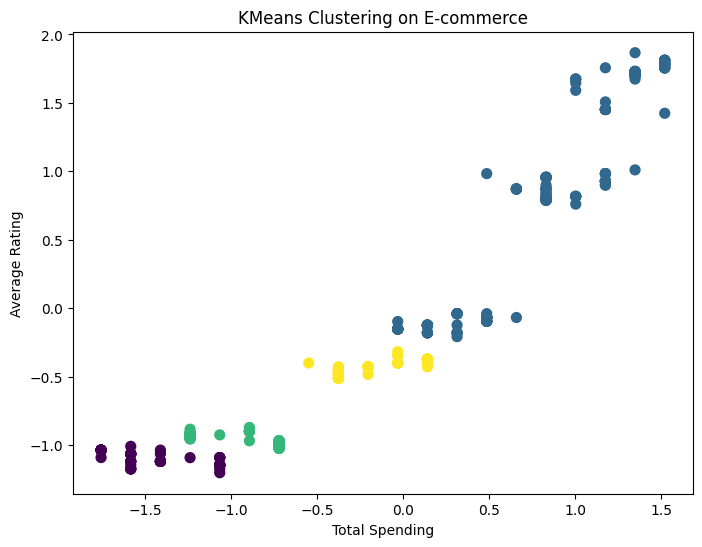

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 13], scaled_data[:, 11], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('KMeans Clustering on E-commerce')
plt.xlabel('Total Spending')
plt.ylabel('Average Rating')
plt.show()

### Can we convert human-readable text to perform the same unsupervised machine learning techniques?

For example, what if we had a dataset full of customer comments and we wanted to group the comments

### Featured Dataset

[Kaggle dataset- IMDB 50k Movie Review](https://www.kaggle.com/datasets/ibrahimqasimi/imdb-50k-cleaned-movie-reviews)


In [100]:
# Download latest version
path = kagglehub.dataset_download("ibrahimqasimi/imdb-50k-cleaned-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-50k-cleaned-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-50k-cleaned-movie-reviews


In [101]:
movie_data = pd.read_csv(f"{path}/IMDB_cleaned.csv")
movie_data= movie_data.drop(columns=['sentiment', 'review'])
movie_data.head()

,cleaned_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically there is a family where a little boy...
4,petter mattei s love in the time of money is a...


#TfidVectorizer

This is the tool we can use to turn what we call **Natural Language** into a **numerical representation** which is typically our goal when we are working with Artificial Intelligence.

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(movie_data['cleaned_review'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 431665 stored elements and shape (5000, 38334)>

In [104]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [106]:
movie_data['Cluster'] = kmeans.labels_
print(movie_data)

                                         cleaned_review  Cluster
0     one of the other reviewers has mentioned that ...        0
1     a wonderful little production the filming tech...        3
2     i thought this was a wonderful way to spend ti...        3
3     basically there is a family where a little boy...        0
4     petter mattei s love in the time of money is a...        4
...                                                 ...      ...
4995  an interesting slasher film with multiple susp...        3
4996  i watched this series when it first came out i...        0
4997  once again jet li brings his charismatic prese...        0
4998  i rented this movie after hearing chris gore s...        3
4999  this was a big disappointment for me i think t...        2

[5000 rows x 2 columns]


In [108]:
import numpy as np

terms = vectorizer.get_feature_names_out()

In [109]:
for i in range(kmeans.n_clusters):
    print(f"\nCluster {i} Top Words:")
    centroid = kmeans.cluster_centers_[i]
    top_indices = centroid.argsort()[-10:][::-1]  # top 10 words
    top_terms = [terms[idx] for idx in top_indices]
    print(", ".join(top_terms))


Cluster 0 Top Words:
movie, story, war, just, game, film, like, time, people, does

Cluster 1 Top Words:
film, films, like, just, good, movie, really, story, bad, time

Cluster 2 Top Words:
movie, bad, good, like, movies, just, really, did, watch, time

Cluster 3 Top Words:
like, just, movie, great, good, series, film, really, funny, time

Cluster 4 Top Words:
film, story, life, movie, character, love, like, time, good, characters


## Word Cluds per Cluster
* Visualize the most frequent words in each cluster.

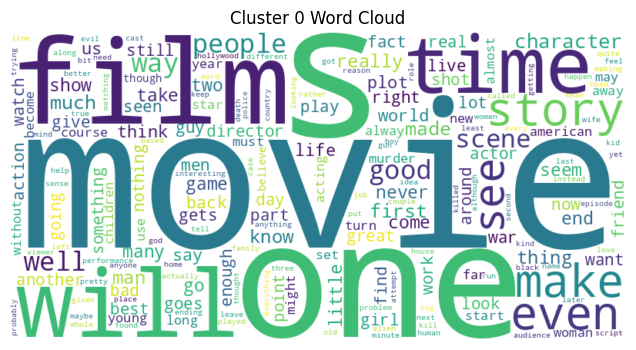

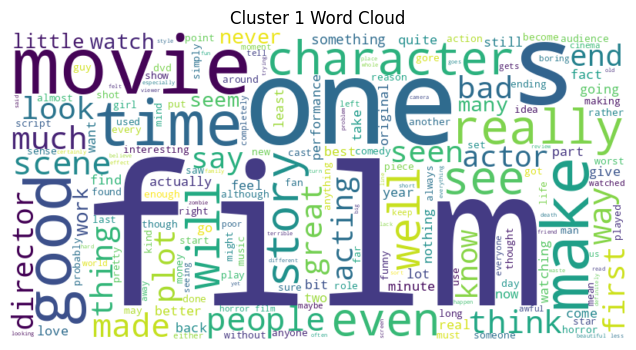

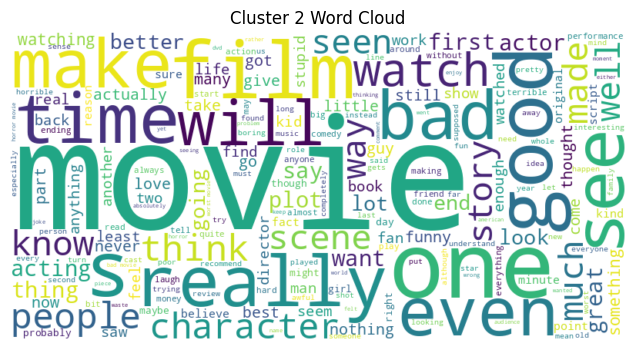

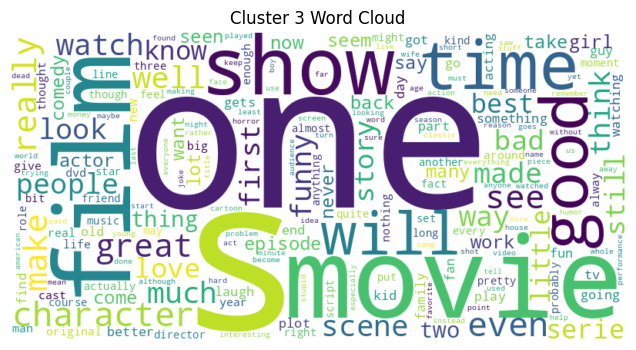

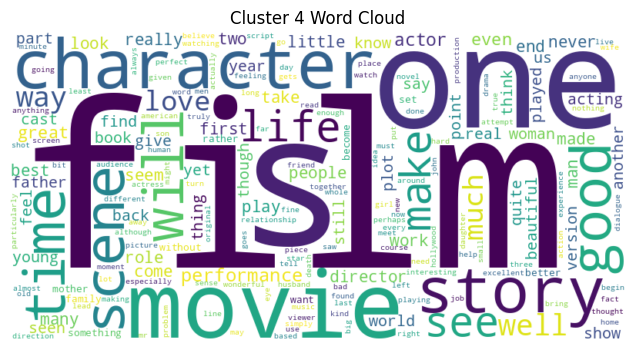

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(kmeans.n_clusters):
    cluster_text = " ".join(movie_data[movie_data['Cluster'] == i]['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

## T-SNE : Help visualize cluster separation

In [113]:
from sklearn.manifold import TSNE

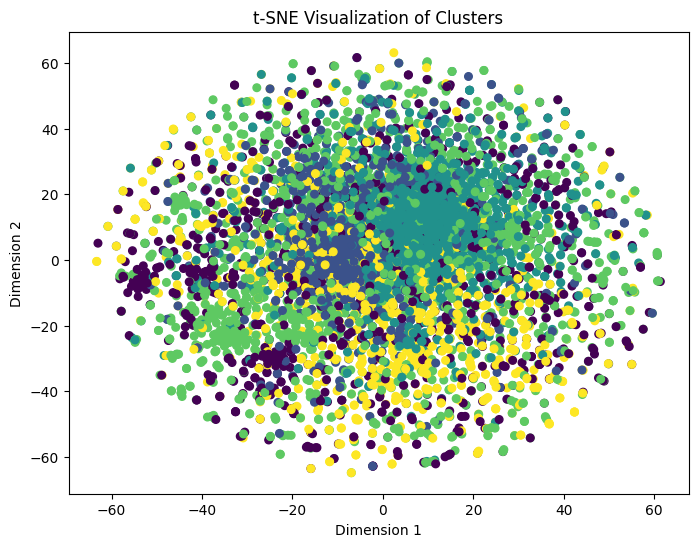

In [114]:
# Reduce high-dimensional TF-IDF vectors to 2D
X_embedded = TSNE(n_components=2, random_state=42, perplexity=50).fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_, cmap='viridis', s=30)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()